# Necessary Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# Loading the given dataset

In [4]:
task2_path = "DA -Task 2..xlsx"
df = pd.read_excel(task2_path, sheet_name="Sheet1")
cleaned = df.copy()
OUT_DIR = Path("axionray_assignment_outputs")
OUT_DIR.mkdir(exist_ok=True, parents=True)

# Column-Wise Analysis: EDA

In [5]:
# Changing the some column to numeric
df1 = df.copy()
df1['REPAIR_DLR_POSTAL_CD'] = pd.to_numeric(df1['REPAIR_DLR_POSTAL_CD'], errors='coerce')
df1["ENGINE_SOURCE_PLANT"] = pd.to_numeric(df1['ENGINE_SOURCE_PLANT'], errors='coerce')
df1["ENGINE_TRACE_NBR"] = pd.to_numeric(df1['ENGINE_TRACE_NBR'], errors='coerce')
df1["LINE_SERIES"] = pd.to_numeric(df1['LINE_SERIES'], errors='coerce')

"""It gives a overall report to get inference from dataset.
It shows the visualization and description of each column"""

import sweetviz as sv

# Generate report
report = sv.analyze(df1)
report.show_html('axionray_assignment_outputs/raw_report.html')  # Opens in browser

                                             |          | [  0%]   00:00 -> (? left)

Report axionray_assignment_outputs/raw_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

**Observation**
1. One data and time column present in dataset.
2. 18 numerical column.
3. 33 object column.

In [7]:
df.head().T

,0,1,2,3,4
VIN,3HCFDDE89SH220903,1HRFFEE8XSZ230636,1HYKSMRK6SZ000990,3HCFDFEL3SH241701,1HRFFHEL1RZ181474
TRANSACTION_ID,13021,13028,13035,13021,13021
CORRECTION_VERBATIM,REPLACED STEERING WHEEL NOW OKAY,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,STEERING WHEEL REPLACEMENT,REPLACED STEERING MESSAGE NO LONGER DISPLAYED
CUSTOMER_VERBATIM,STEERING WHEEL COMING APART,CUSTOMER STATES HEATED STEERING WHEEL INOP,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...
REPAIR_DATE,2024-01-02 00:00:00,2024-01-03 00:00:00,2024-01-04 00:00:00,2024-01-04 00:00:00,2024-01-05 00:00:00
CAUSAL_PART_NM,WHEEL ASM-STRG *JET BLACK,MODULE ASM-STRG WHL HT CONT,WHEEL ASM-STRG *BACKEN BLACKK,WHEEL ASM-STRG *JET BLACK,WHEEL ASM-STRG *JET BLACK
GLOBAL_LABOR_CODE_DESCRIPTION,Steering Wheel Replacement,Heated Steering Wheel Module Replacement,Steering Wheel Replacement,Steering Wheel Replacement,Steering Wheel Replacement
PLATFORM,Full-Size Trucks,Full-Size Trucks,BEV,Full-Size Trucks,Full-Size Trucks
BODY_STYLE,Crew Cab,Crew Cab,4 Door Utility,Crew Cab,Crew Cab
VPPC,T1CCF,T1CGF,L233-LSOP,T1CCF,T1CGF


In [8]:
pd.DataFrame(df.dtypes)

,0
VIN,object
TRANSACTION_ID,int64
CORRECTION_VERBATIM,object
CUSTOMER_VERBATIM,object
REPAIR_DATE,datetime64[ns]
CAUSAL_PART_NM,object
GLOBAL_LABOR_CODE_DESCRIPTION,object
PLATFORM,object
BODY_STYLE,object
VPPC,object


All the columns and its correspond datatypes.

In [9]:
df.shape

(100, 52)

In total, it have 100 rows and 52 columns. Column "CAMPAIGN_NBR" does not have single valuse. It have droped from dataset.

In [10]:
df.drop("CAMPAIGN_NBR", axis=1, inplace=True)
df["ENGINE_SOURCE_PLANT"] = pd.to_numeric(df['ENGINE_SOURCE_PLANT'], errors='coerce')


In [11]:
null_col_df=pd.DataFrame(df.isnull().sum())
null_col_df=null_col_df[null_col_df[0]>0]
print(len(null_col_df))
null_col_df

14


,0
CAUSAL_PART_NM,5
PLANT,1
STATE,2
REPAIR_DLR_POSTAL_CD,2
VEH_TEST_GRP,2
OPTN_FAMLY_CERTIFICATION,10
OPTF_FAMLY_EMISSIOF_SYSTEM,5
TOTALCOST,6
ENGINE_SOURCE_PLANT,17
ENGINE_TRACE_NBR,12


Total 18 columns has null valuse. it has been replaced with mode for object and median for numeric column.

In [12]:
for c in null_col_df.index.tolist():
    if df[c].dtype == "object":
        df[c] = df[c].fillna(df[c].mode()[0])
    else:
        df[c] = df[c].fillna(df[c].median())

C:\Users\Sivaperumalraj G\AppData\Local\Temp\ipykernel_16008\1636245243.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  df[c] = df[c].fillna(df[c].mode()[0])


In [13]:
df.duplicated().sum()

0

It has zero duplicate records.

In [14]:
print("shape: ",df.describe(include="object").T.shape)
df.describe(include="object").T

shape:  (32, 4)


,count,unique,top,freq
VIN,100,98,3HRS9EED0LH255650,2
CORRECTION_VERBATIM,100,93,Replaced steering wheel,3
CUSTOMER_VERBATIM,100,100,STEERING WHEEL COMING APART,1
CAUSAL_PART_NM,100,18,WHEEL ASM-STRG *JET BLACK,50
GLOBAL_LABOR_CODE_DESCRIPTION,100,4,Steering Wheel Replacement,78
PLATFORM,100,11,Full-Size Trucks,52
BODY_STYLE,100,6,Crew Cab,50
VPPC,100,26,T1CCF,20
PLANT,100,11,SIL,20
BUILD_COUNTRY,100,3,US,73


All the object columns statistical report.

In [15]:
print("shape: ", df.describe().T.shape)
df.describe().T

shape:  (19, 8)


,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,100.0,13036.9,13021.0,13027.75,13036.0,13041.25,13081.0,12.028166
REPAIR_DATE,100,2024-01-22 07:26:24,2024-01-02 00:00:00,2024-01-12 00:00:00,2024-01-24 12:00:00,2024-02-01 00:00:00,2024-02-07 00:00:00,NaN
DEALER_REGION,100.0,1.09,1.0,1.0,1.0,1.0,4.0,0.51434
REPAIR_AGE,100.0,14.94,0.0,5.0,12.0,21.0,50.0,12.367945
KM,100.0,24914.23,3.0,8883.25,21962.0,35493.25,107905.0,20747.078206
COMPLAINT_CD_CSI,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORD_SELLING_SRC_CD,100.0,24.59,11.0,13.0,13.0,48.0,72.0,17.822976
GLOBAL_LABOR_CODE,100.0,251.9,20.0,130.0,130.0,130.0,2400.0,546.451722
REPORTING_COST,100.0,531.1932,27.69,305.4325,433.97,554.0625,2457.45,411.161608
TOTALCOST,100.0,554.9259,27.69,349.94,457.225,572.7725,3205.45,439.561893


All the numerical columns statistical report.

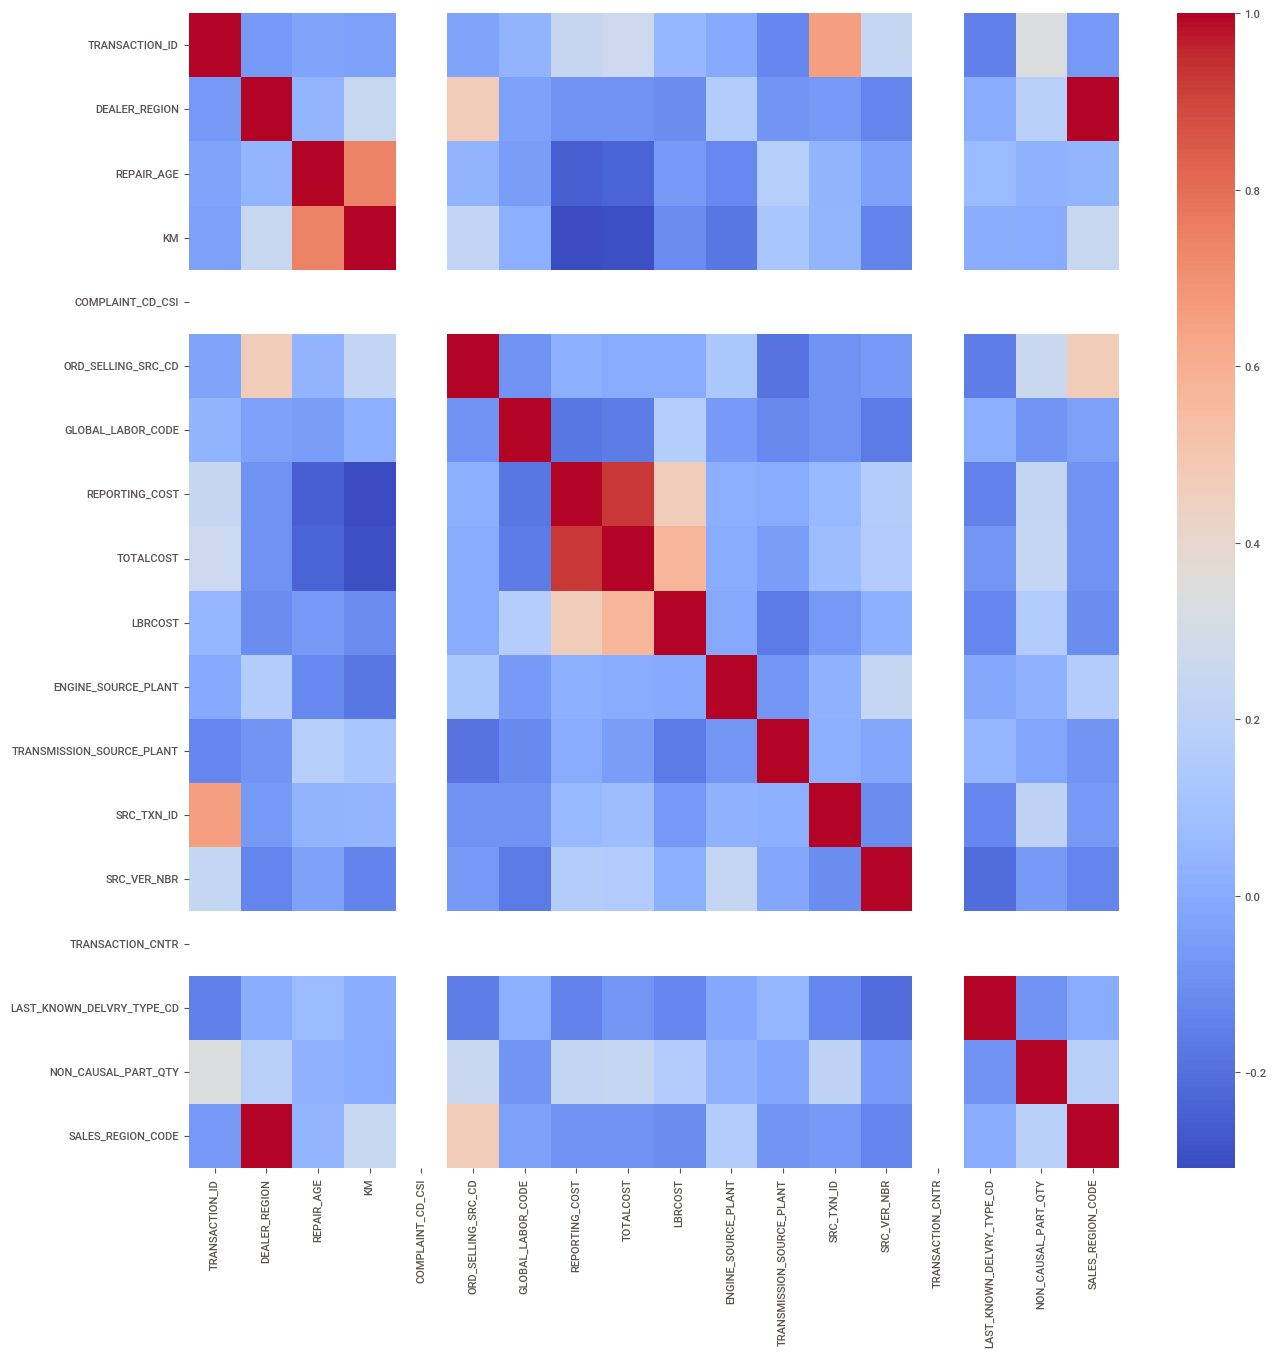

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),  cmap="coolwarm")
plt.show()

The general correlation among the numerical column.

In [17]:
df.corr(numeric_only=True)

,TRANSACTION_ID,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE_SOURCE_PLANT,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
TRANSACTION_ID,1.000000,-0.067105,-0.027201,-0.038570,NaN,-0.022386,0.035637,0.240835,0.262429,0.051153,-0.004278,-0.124738,0.654961,0.235531,NaN,-0.144991,0.339603,-0.067105
DEALER_REGION,-0.067105,1.000000,0.043730,0.244591,NaN,0.470161,-0.039428,-0.088291,-0.092129,-0.105307,0.162581,-0.083578,-0.064121,-0.133569,NaN,0.007528,0.181506,1.000000
REPAIR_AGE,-0.027201,0.043730,1.000000,0.741879,NaN,0.038471,-0.052293,-0.249648,-0.236120,-0.060561,-0.122620,0.173397,0.035234,-0.037128,NaN,0.067563,0.026817,0.043730
KM,-0.038570,0.244591,0.741879,1.000000,NaN,0.224812,0.022554,-0.308531,-0.293461,-0.111218,-0.179254,0.122720,0.043414,-0.136741,NaN,0.008680,0.000084,0.244591
COMPLAINT_CD_CSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORD_SELLING_SRC_CD,-0.022386,0.470161,0.038471,0.224812,NaN,1.000000,-0.087702,0.021832,-0.000153,0.001129,0.132135,-0.190492,-0.087529,-0.066134,NaN,-0.155311,0.258294,0.470161
GLOBAL_LABOR_CODE,0.035637,-0.039428,-0.052293,0.022554,NaN,-0.087702,1.000000,-0.176848,-0.163164,0.168188,-0.058543,-0.116627,-0.083926,-0.167109,NaN,0.017285,-0.083135,-0.039428
REPORTING_COST,0.240835,-0.088291,-0.249648,-0.308531,NaN,0.021832,-0.176848,1.000000,0.923400,0.460660,0.019261,0.000664,0.060805,0.165116,NaN,-0.141336,0.231603,-0.088291
TOTALCOST,0.262429,-0.092129,-0.236120,-0.293461,NaN,-0.000153,-0.163164,0.923400,1.000000,0.573277,0.006452,-0.052055,0.078815,0.154327,NaN,-0.075413,0.237360,-0.092129
LBRCOST,0.051153,-0.105307,-0.060561,-0.111218,NaN,0.001129,0.168188,0.460660,0.573277,1.000000,-0.005322,-0.166208,-0.066831,0.014829,NaN,-0.128256,0.159877,-0.105307


The general correlation among numrical column in the form of numeric.

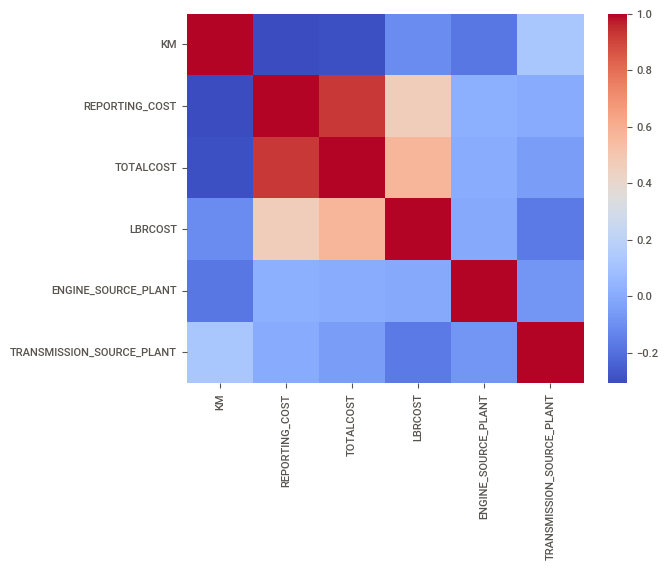

In [18]:
# numerical_df = df1.select_dtypes(include=['number'])
# print(numerical_df.columns)
numeric_col=['KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'ENGINE_SOURCE_PLANT', 'TRANSMISSION_SOURCE_PLANT']
sns.heatmap(df[numeric_col].corr(), cmap="coolwarm")
plt.show()

The above correlation are with some important column.

## Column wise visualization

Dtype: Numerical
column Name:  TRANSACTION_ID


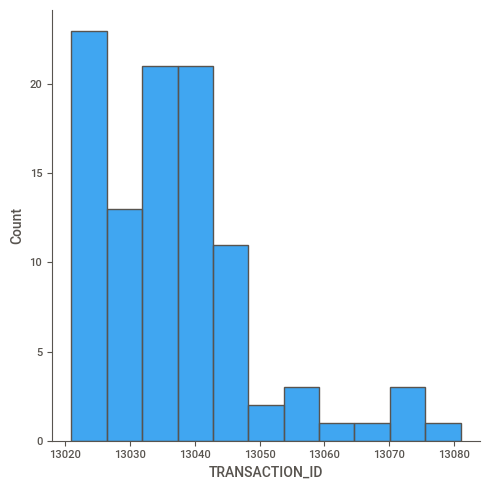

Dtype: Numerical
column Name:  REPAIR_DATE


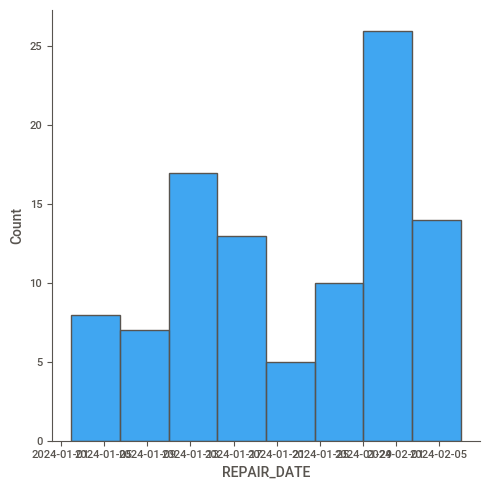

Dtype: Object
column Name:  CAUSAL_PART_NM


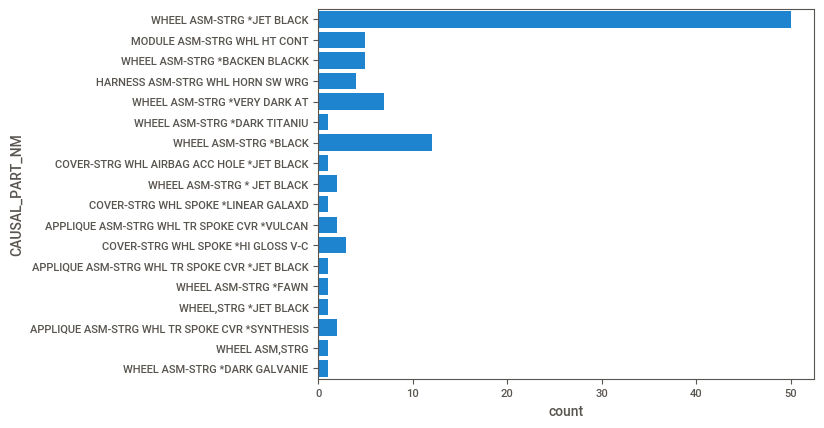

Dtype: Object
column Name:  GLOBAL_LABOR_CODE_DESCRIPTION


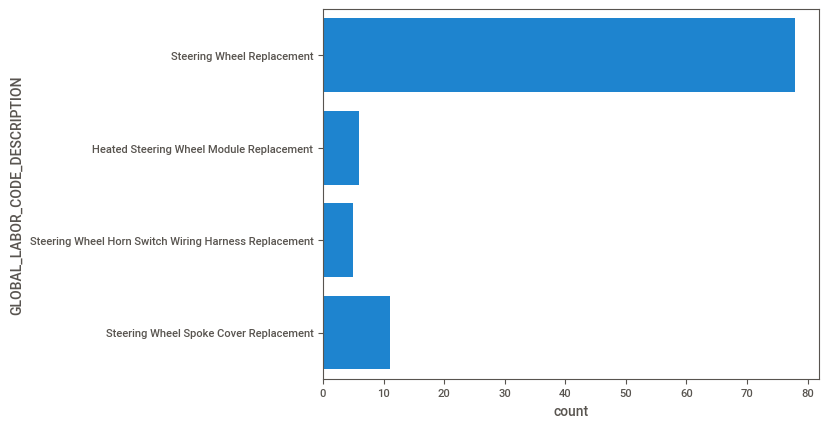

Dtype: Object
column Name:  PLATFORM


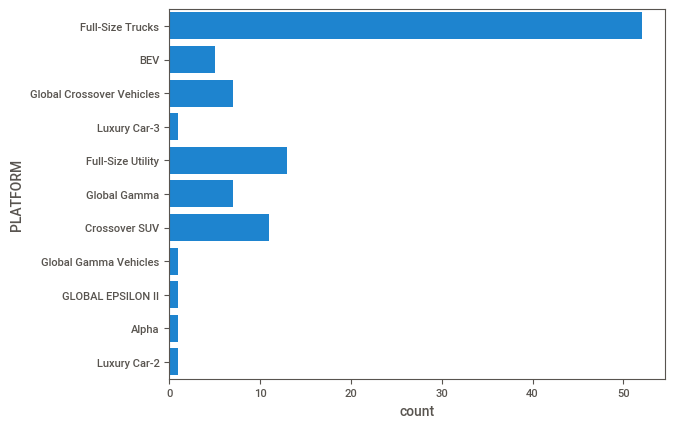

Dtype: Object
column Name:  BODY_STYLE


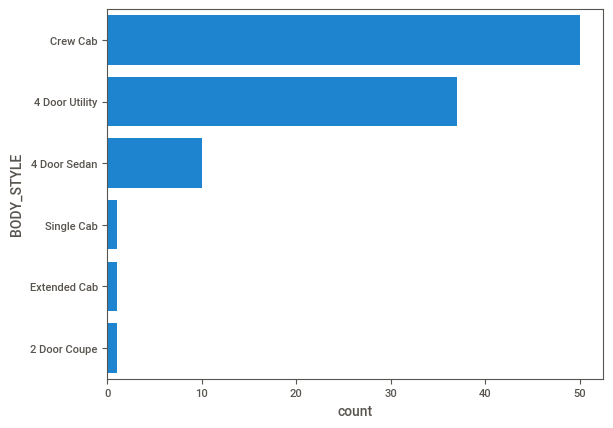

Dtype: Object
column Name:  VPPC


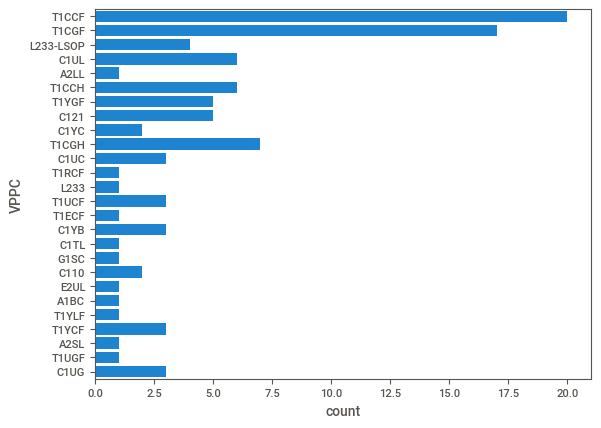

Dtype: Object
column Name:  PLANT


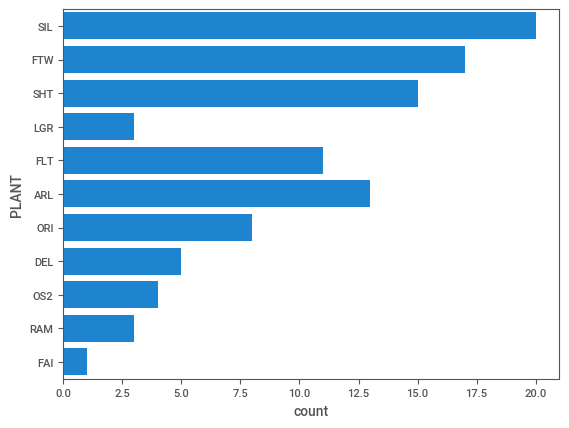

Dtype: Object
column Name:  BUILD_COUNTRY


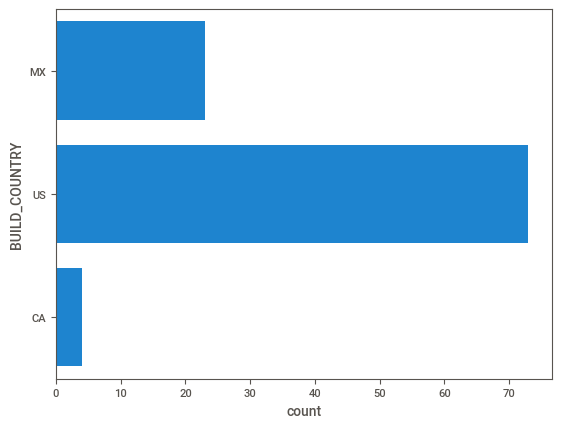

Dtype: Object
column Name:  STATE


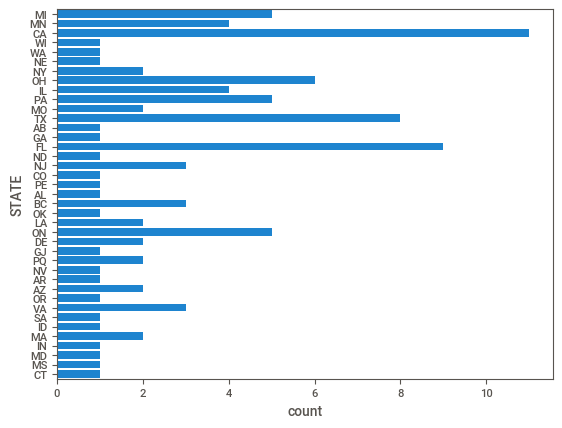

Dtype: Numerical
column Name:  DEALER_REGION


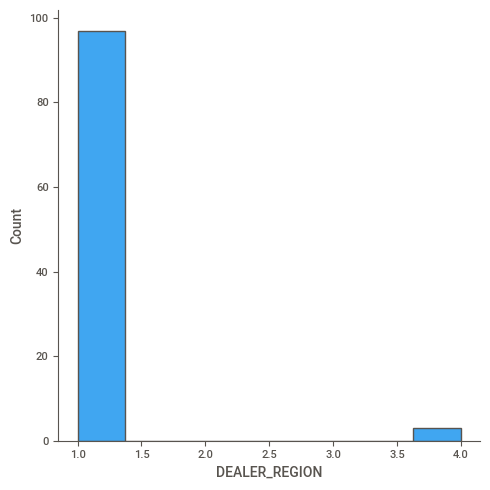

Dtype: Numerical
column Name:  REPAIR_AGE


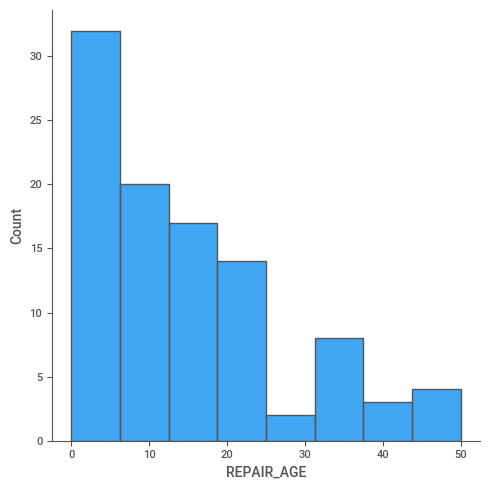

Dtype: Numerical
column Name:  KM


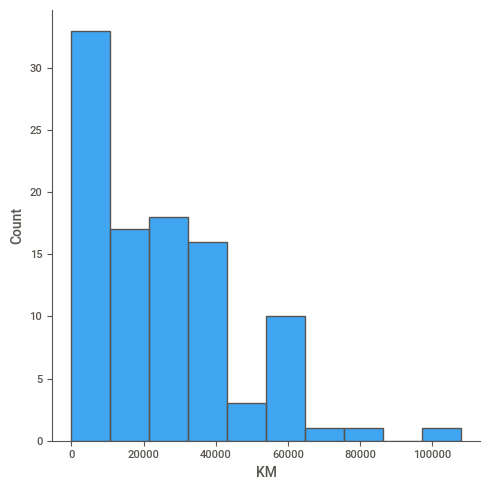

Dtype: Numerical
column Name:  COMPLAINT_CD_CSI


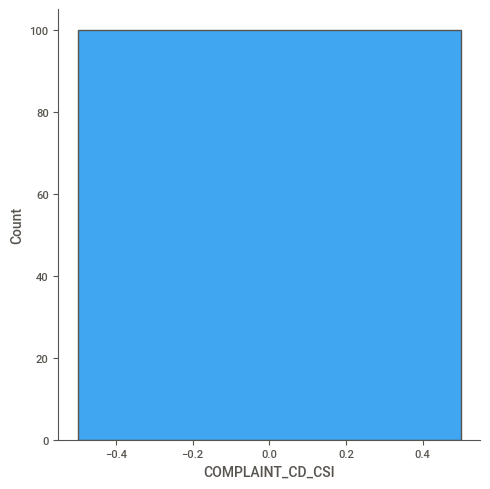

Dtype: Object
column Name:  COMPLAINT_CD


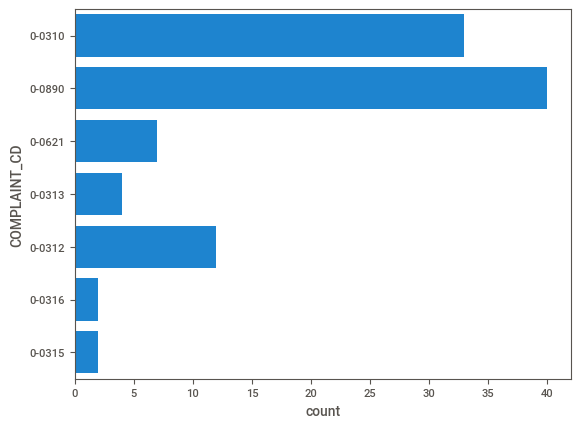

Dtype: Object
column Name:  VEH_TEST_GRP


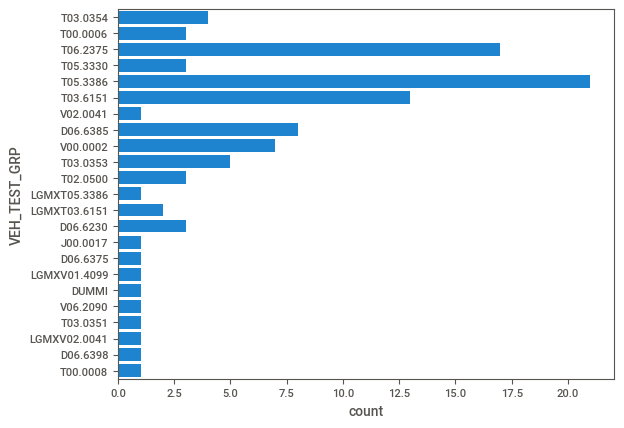

Dtype: Object
column Name:  COUNTRY_SALE_ISO


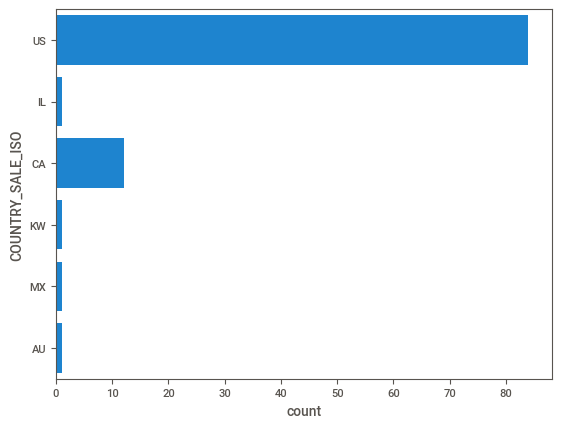

Dtype: Numerical
column Name:  ORD_SELLING_SRC_CD


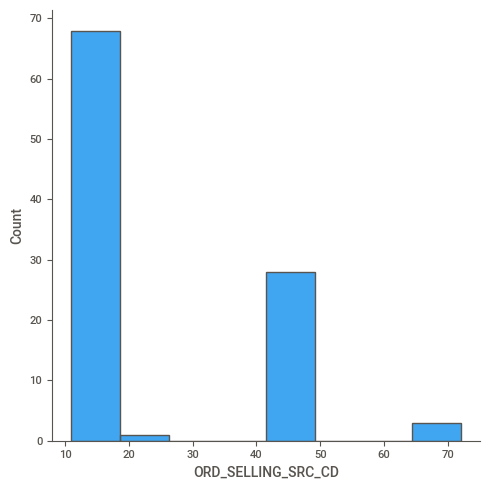

Dtype: Object
column Name:  OPTN_FAMLY_CERTIFICATION


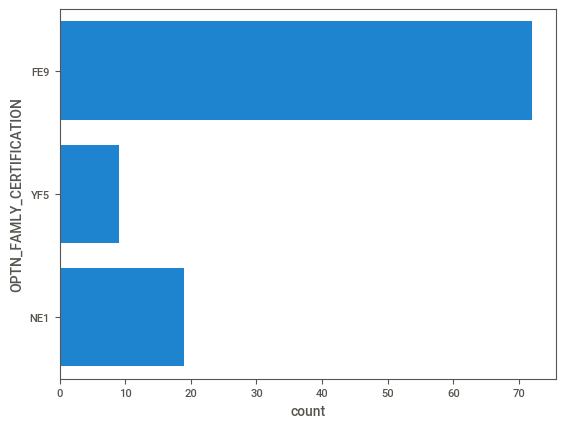

Dtype: Object
column Name:  OPTF_FAMLY_EMISSIOF_SYSTEM


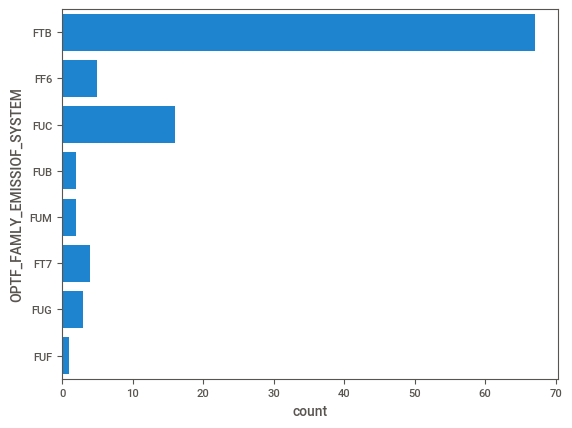

Dtype: Numerical
column Name:  GLOBAL_LABOR_CODE


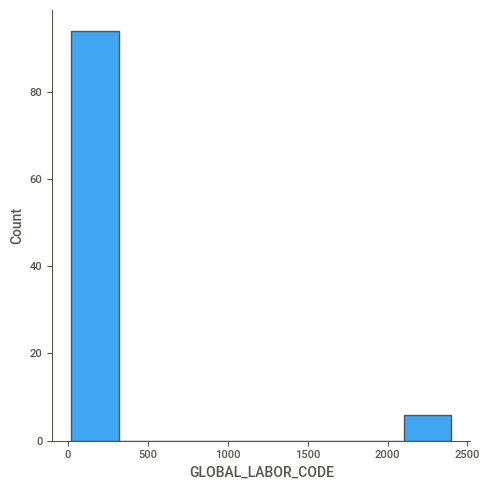

Dtype: Object
column Name:  TRANSACTION_CATEGORY


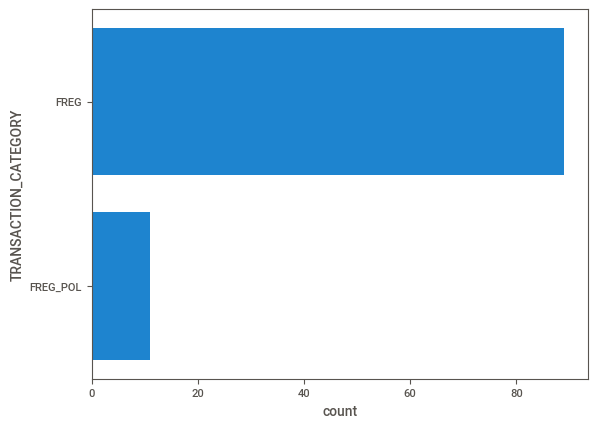

Dtype: Numerical
column Name:  REPORTING_COST


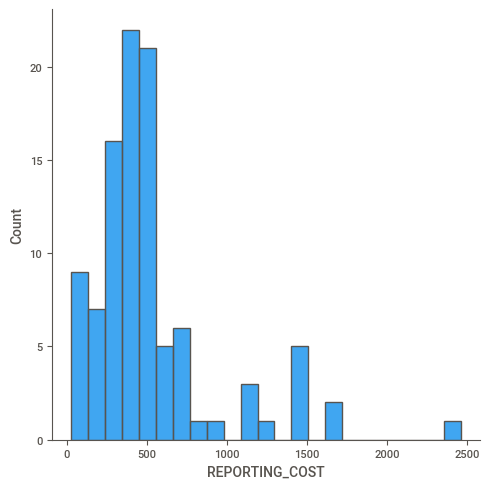

Dtype: Numerical
column Name:  TOTALCOST


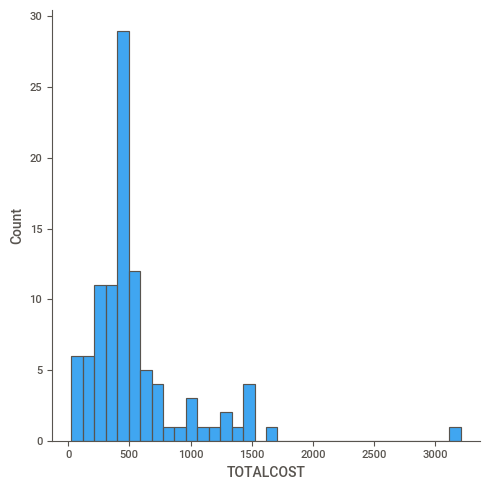

Dtype: Numerical
column Name:  LBRCOST


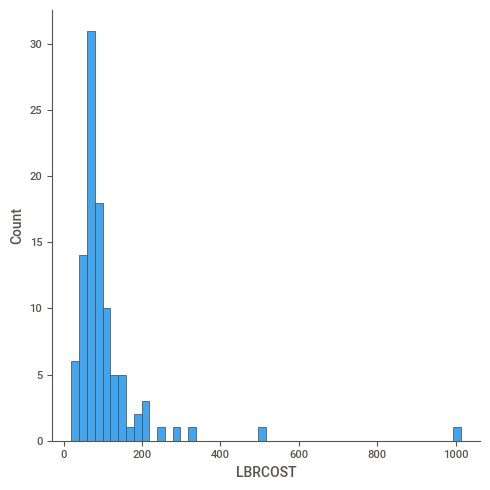

Dtype: Object
column Name:  ENGINE


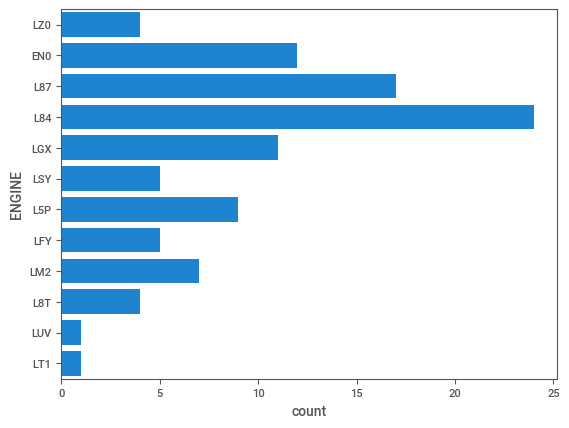

Dtype: Object
column Name:  ENGINE_DESC


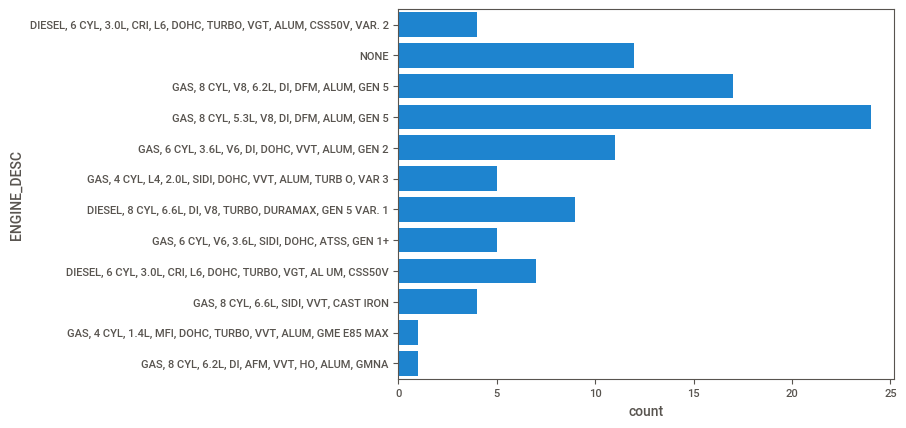

Dtype: Object
column Name:  TRANSMISSION


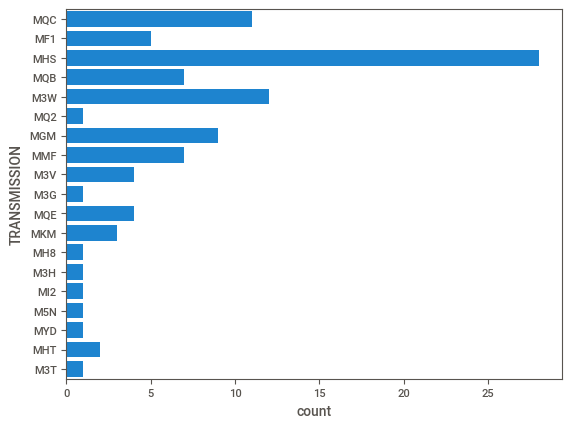

Dtype: Object
column Name:  TRANSMISSION_DESC


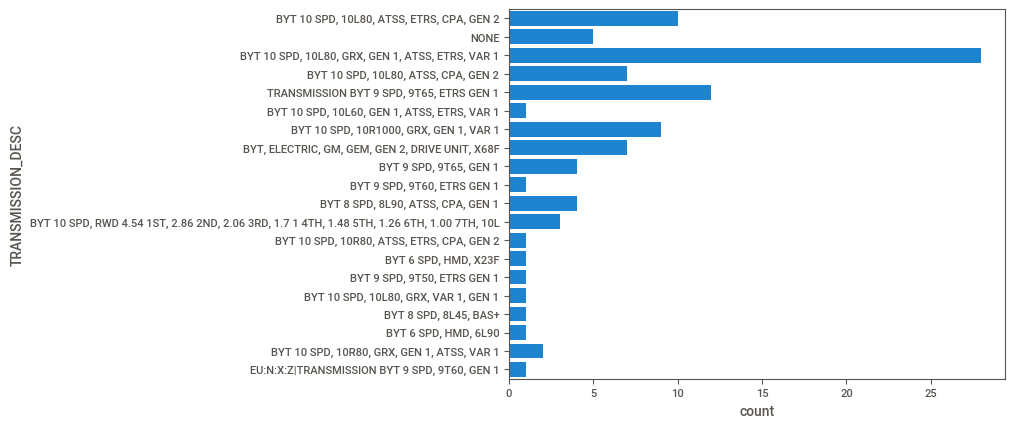

Dtype: Numerical
column Name:  ENGINE_SOURCE_PLANT


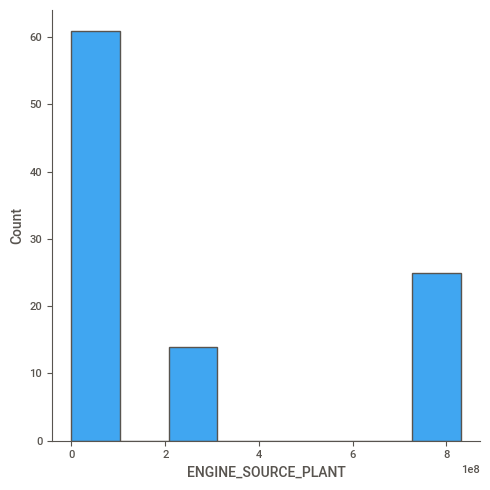

Dtype: Numerical
column Name:  SRC_TXN_ID


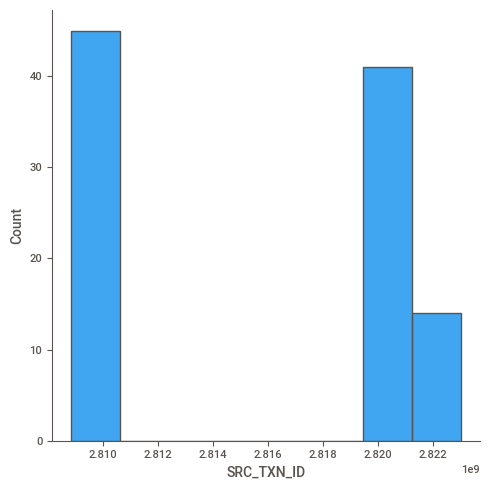

Dtype: Numerical
column Name:  SRC_VER_NBR


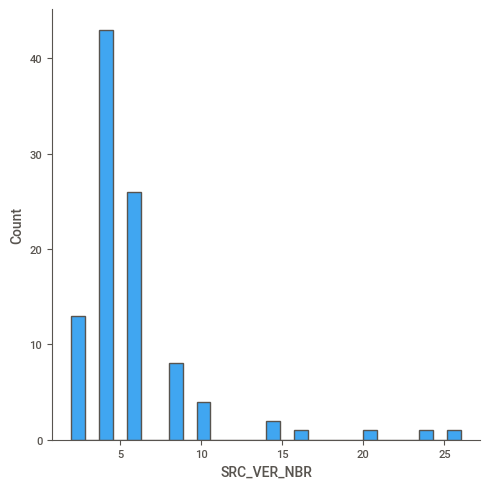

Dtype: Numerical
column Name:  TRANSACTION_CNTR


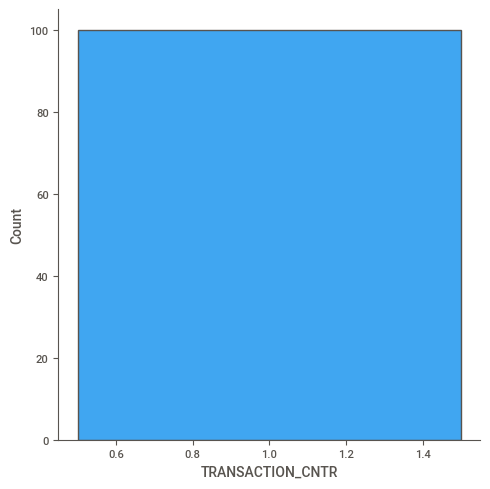

Dtype: Object
column Name:  MEDIA_FLAG


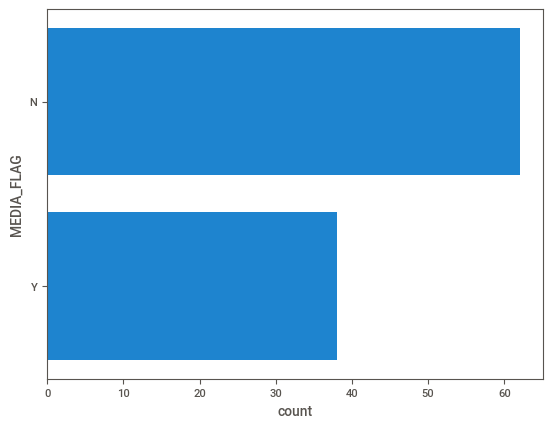

Dtype: Object
column Name:  VIN_MODL_DESGTR


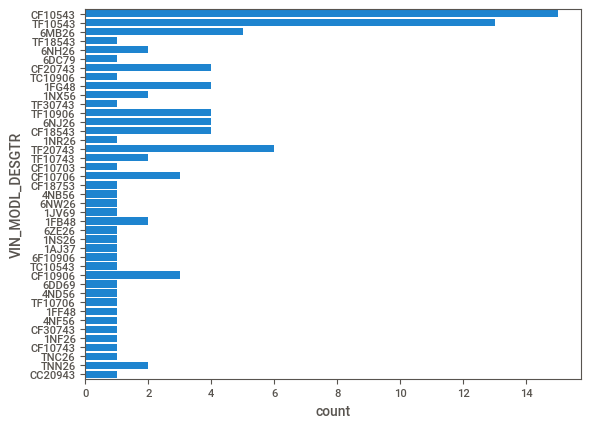

Dtype: Object
column Name:  LINE_SERIES


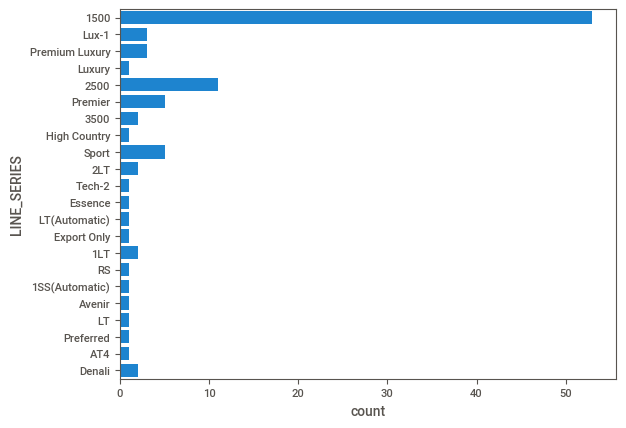

Dtype: Numerical
column Name:  LAST_KNOWN_DELVRY_TYPE_CD


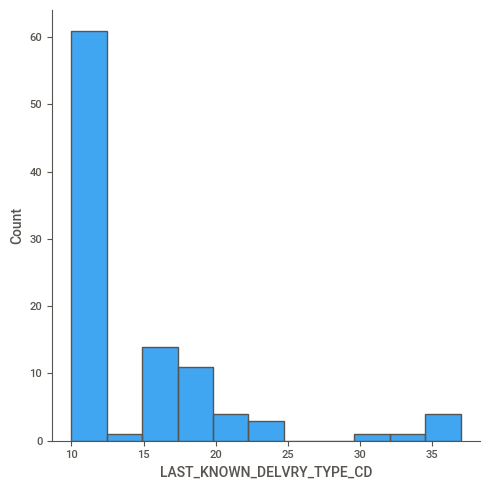

Dtype: Numerical
column Name:  NON_CAUSAL_PART_QTY


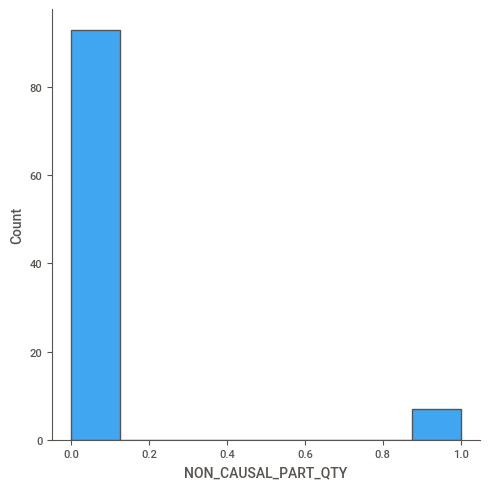

Dtype: Numerical
column Name:  SALES_REGION_CODE


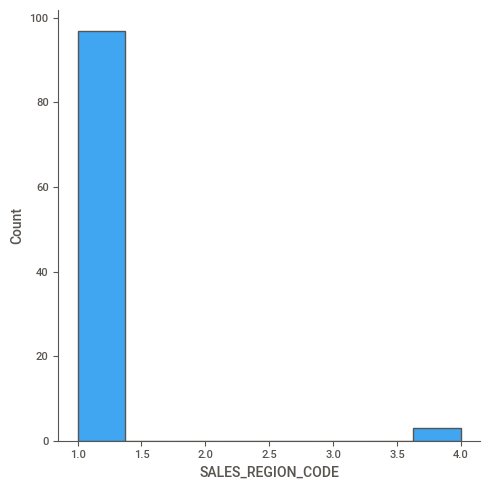

In [19]:
use_full_col = 	['TRANSACTION_ID',  
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
	    'STATE', 'DEALER_REGION',
        'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY',
       'SALES_REGION_CODE']

for c in use_full_col:
    if df[c].dtype != "object":
        print("Dtype: Numerical")
        print("column Name: ", c)
        sns.displot(data=df, x=c)
        plt.show()
    else:
        print("Dtype: Object")
        print("column Name: ", c)
        sns.countplot(df[c])
        plt.show()

# Identifying Critical Columns:

### Column - KM
* Indicates vehicle mileage — a direct proxy for wear and usage. Correlates strongly with both TOTALCOST and failure frequency. Helps model preventive maintenance schedules.

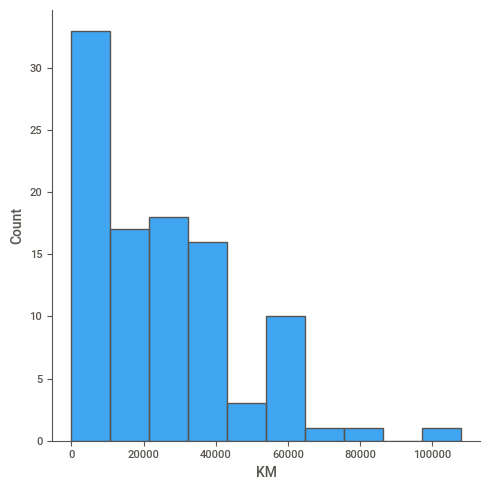

In [20]:
sns.displot(data=df, x="KM")
plt.show()

Observation: The are more than 30 items fall under the 0 to 10000. And major product are fall between 0 to 60000.

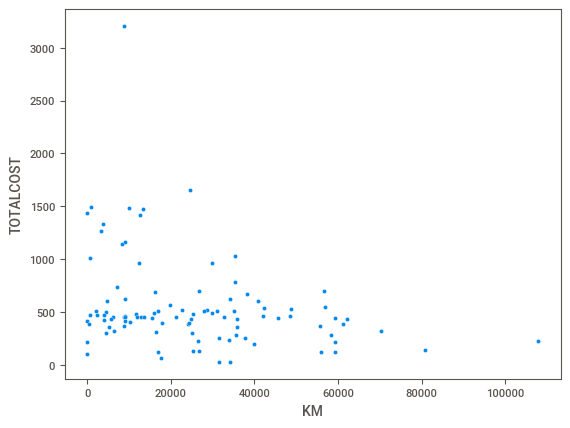

In [21]:
sns.scatterplot(data=df, x="KM", y="TOTALCOST")
plt.show()

Observation: There is no correlation between TOTALCOST vs KM.

### Column - TOTALCOST
* Represents the overall repair expense. Crucial for cost analysis, warranty claims, and ROI tracking. Outliers here can signal billing errors or major failures.

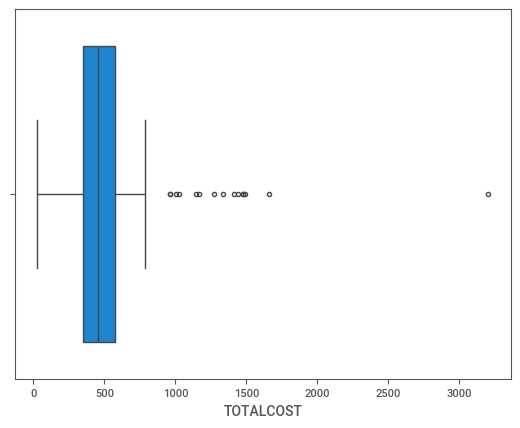

In [22]:
sns.boxplot(data=df, x="TOTALCOST")
plt.show()

Observation: The are some outlier have visibled. All the outliers are in the above upperbound. The upperbound somewhere in 1000.

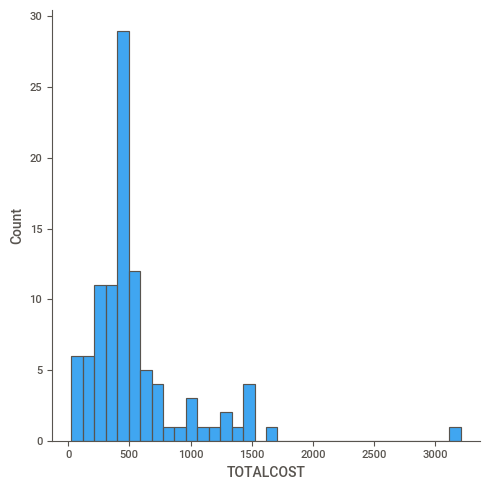

In [23]:
sns.displot(data=df, x="TOTALCOST")
plt.show()

Observation: The TOTALCOST column distribution shows right skewed.

### Column - CAUSAL_PART_NM
* Describes the part responsible for the fault. Central to identifying repetitive defects, supplier quality issues, and inventory optimization.

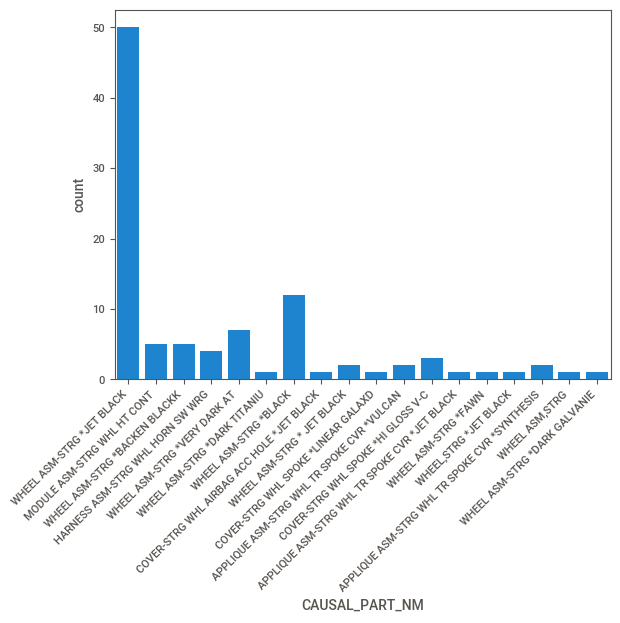

In [24]:
sns.countplot(data=df, x="CAUSAL_PART_NM")
plt.xticks(rotation=45, ha='right')
plt.show()

Observation: The "WHEEL ASM-STR *JET BLACK" field has high occurance of 50.

### Column - REPAIR_AGE
* Gives time-based context: when the repair happened or how old the vehicle was. Enables trend and reliability analyses (seasonality, aging patterns).

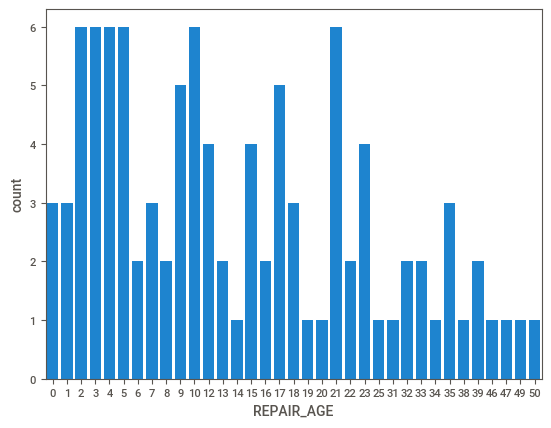

In [25]:
sns.countplot(data=df, x="REPAIR_AGE")
plt.show()

Observation: The REPAIR_AGE column has gamma distribution.

### Column - CUSTOMER_VERBATIM (or CORRECTION_VERBATIM)
* Contains raw customer or technician text. Text mining here reveals recurring complaints, product pain points, and emerging issues not yet coded.
* These are the text based column. It have to be used with NLP.

In [26]:
df["CORRECTION_VERBATIM"]

0                      REPLACED STEERING WHEEL NOW OKAY
1     CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...
2     APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...
3                            STEERING WHEEL REPLACEMENT
4         REPLACED STEERING MESSAGE NO LONGER DISPLAYED
                            ...                        
95    REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4
96                               replace steering wheel
97              REPLACE STEERING WHEEL PRA 496735300000
98    REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...
99    R&R steering wheel for bad stitching. -returne...
Name: CORRECTION_VERBATIM, Length: 100, dtype: object

In [27]:
df["CUSTOMER_VERBATIM"]

0                           STEERING WHEEL COMING APART
1            CUSTOMER STATES HEATED STEERING WHEEL INOP
2     OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...
3     CUSTOMER STATES THE LETTERING AND FINISH ON TH...
4     C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...
                            ...                        
95    CUSTOMER STATES that the steering is very tigh...
96    cs driver assistance warning light is coming o...
97    CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...
98    CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...
99    11BUZ MINOR ELECTRICAL CUST STATES STITCHING C...
Name: CUSTOMER_VERBATIM, Length: 100, dtype: object

# Generating tags/features from free text available :

### Standardize some string columns

In [28]:
lower_cols = ["STATE","BUILD_COUNTRY","PLATFORM","BODY_STYLE","PLANT","DEALER_NAME","LAST_KNOWN_DLR_NAME"]
for c in lower_cols:
    if c in cleaned.columns:
        cleaned[c] = cleaned[c].astype(str).replace({"nan":pd.NA}).str.strip().str.lower()

### Fill small missing categories and numeric with median if appropriate

In [29]:

for c in cleaned.select_dtypes(include=['object']).columns:
    miss = cleaned[c].isna().sum()
    if miss>0 and miss/len(cleaned) <= 0.05:
        mode = cleaned[c].mode(dropna=True)
        if len(mode)>0:
            cleaned[c] = cleaned[c].fillna(mode.iloc[0])
for c in cleaned.select_dtypes(include=[np.number]).columns:
    miss = cleaned[c].isna().sum()
    if miss>0 and miss/len(cleaned) <= 0.05:
        cleaned[c] = cleaned[c].fillna(cleaned[c].median())

NameError: name 'np' is not defined

### Outlier flags for KM and TOTALCOST

In [ ]:

for col in ["KM","TOTALCOST"]:
    if col in cleaned.columns:
        ser = pd.to_numeric(cleaned[col], errors='coerce')
        q1 = ser.quantile(0.25); q3 = ser.quantile(0.75); iqr = q3-q1
        low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
        cleaned[f"{col}_outlier"] = ser.apply(lambda x: True if (pd.notna(x) and (x<low or x>high)) else False)

### Generate tags from free text columns

In [ ]:

text_fields = ["CAUSAL_PART_NM","CORRECTION_VERBATIM","CUSTOMER_VERBATIM"]
combined_text = []
for f in text_fields:
    if f in cleaned.columns:
        combined_text += cleaned[f].dropna().astype(str).str.lower().tolist()

stopwords = set(['the','and','is','in','to','a','of','for','on','with','no','not','was','were','from','vehicle','unit','problem','customer','reported','replace','replaced','assembly','assy','leak','leaking','leaks','left','right','front','rear','one','two','service','during','test','after','before'])

def tokenize(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]',' ', text)
    toks = [t for t in text.split() if len(t)>2 and t not in stopwords and not t.isdigit()]
    return toks

cnt = Counter()
for t in combined_text:
    cnt.update(tokenize(t))
top_keywords = [w for w,c in cnt.most_common(200)]

def row_tags(row):
    tokens = []
    for f in text_fields:
        if f in row and pd.notna(row[f]):
            tokens += tokenize(row[f])
    found = []
    for k in top_keywords:
        if k in tokens and k not in found:
            found.append(k)
    return found[:6]

cleaned["generated_tags"] = cleaned.apply(row_tags, axis=1)
cleaned.to_excel(OUT_DIR/"DA_Task2_cleaned_tagged.xlsx", index=False)
cleaned.to_csv(OUT_DIR/"DA_Task2_cleaned_tagged.csv", index=False)

### Visualizations

In [ ]:

if "KM" in cleaned.columns:
    ser = pd.to_numeric(cleaned["KM"], errors='coerce').dropna()
    plt.figure(figsize=(8,5)); plt.hist(ser, bins=20); plt.title("Distribution of KM"); plt.xlabel("KM"); plt.ylabel("Count"); plt.tight_layout(); plt.savefig(OUT_DIR/"viz_km_histogram.png"); plt.close()
if "CAUSAL_PART_NM" in cleaned.columns:
    top_parts = cleaned["CAUSAL_PART_NM"].dropna().astype(str).value_counts().head(10)
    plt.figure(figsize=(8,5)); plt.bar(top_parts.index.astype(str), top_parts.values); plt.xticks(rotation=45, ha="right"); plt.title("Top 10 Causal Parts"); plt.tight_layout(); plt.savefig(OUT_DIR/"viz_top_causal_parts.png"); plt.close()
if "TOTALCOST" in cleaned.columns and "KM" in cleaned.columns:
    tmp = cleaned[["KM","TOTALCOST"]].copy(); tmp["KM"] = pd.to_numeric(tmp["KM"],errors='coerce'); tmp["TOTALCOST"] = pd.to_numeric(tmp["TOTALCOST"],errors='coerce'); tmp = tmp.dropna()
    plt.figure(figsize=(7,5)); plt.scatter(tmp["KM"], tmp["TOTALCOST"]); plt.xlabel("KM"); plt.ylabel("TOTALCOST"); plt.title("TOTALCOST vs KM"); plt.tight_layout(); plt.savefig(OUT_DIR/"viz_totalcost_vs_km.png"); plt.close()

print("Processing complete. Outputs saved to", OUT_DIR)

Processing complete. Outputs saved to axionray_assignment_outputs


# Summary and Insights
Task 2 - Column Analysis and Cleaning Summary
Dataset shape: (100, 55)

Top critical columns (selected): KM, TOTALCOST, CAUSAL_PART_NM, REPAIR_DATE, REPAIR_AGE

Cleaning steps applied (summary):
- Standardized string columns by trimming whitespace. Lowercased selected categorical columns (STATE, BUILD_COUNTRY, PLATFORM, BODY_STYLE, PLANT).
- Filled categorical missing values with mode where missingness <= 5% of rows.
- Filled numeric missing values with median where missingness <= 5% of rows.
- Flagged outliers in KM and TOTALCOST using IQR rule and added boolean columns indicating outliers.
- Generated tags from CAUSAL_PART_NM, CORRECTION_VERBATIM and CUSTOMER_VERBATIM by tokenizing and selecting top keywords per row.

Top generated tags (sample): [('steering', 98), ('wheel', 97), ('strg', 95), ('asm', 89), ('black', 62), ('states', 56), ('jet', 27), ('heated', 11), ('coming', 10), ('whl', 10), ('found', 5), ('removed', 5), ('pra', 3), ('horn', 3), ('check', 3), ('cover', 3), ('sop', 3), ('module', 3), ('concern', 2), ('off', 2)]

Actionable insights (food for thought):
- High KM vehicles with higher TOTALCOST may indicate aging fleet cost trends; consider targeted preventive maintenance for high-mileage vehicles.
- Frequent causal parts (see viz_top_causal_parts) can inform spare-parts stock planning and supplier quality audits.
- Common tags found in customer and correction verbatims (e.g., steering, wheel, strg, asm, black) can be used to build a small taxonomy for automated routing of repairs.
- Outlier repairs (flagged) should be reviewed manually to check for billing errors or special incidents.

Files created in output directory: /mnt/data/axionray_assignment_outputs
Visualizations saved: viz_km_histogram.png, viz_top_causal_parts.png, viz_totalcost_vs_km.png